In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Upwind 1D Continuity -  Constant Velocity

In [17]:
# Params
Nsteps = 500
nx = 500
sizeX = 1.0
dif = 0
vel = .1
# dx = sizeX/(nx-1)
x = np.linspace(0,1,Nsteps)
f = np.zeros([Nsteps,nx])
dx = x[1]-x[0]
cfl = .1
if dif != 0:
    dtd = .5*dx**2/dif
else:
    dtd = 1.0
if vel != 0:
    dta = dx/vel
dt = cfl *np.min([dtd,dta])

dnum = dx*dx/dt
delta = dif/dnum

sigma = 20*dx
xm = .5*(sizeX-sigma)
xp = .5*(sizeX+sigma)

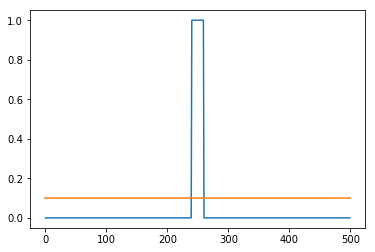

In [20]:
f[0][(xm<x) & (x<xp)] = 1
plt.plot(f[0])

u = np.ones(nx)*vel
plt.plot(u)

Object `np.and` not found.
